# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [11]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd
from keras.metrics import sparse_categorical_crossentropy
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.layers import Flatten, Dense, Dropout
"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

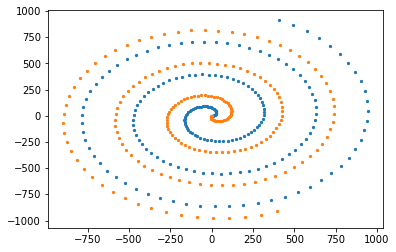

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

C:\Users\mahna\AppData\Local\Temp\ipykernel_8208\2939864048.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


0    201
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [6]:
df

,X,Y,CLASS
0,0.000000,0.000000,0
1,4.975021,0.499167,0
2,9.800666,1.986693,0
3,14.330047,4.432803,0
4,18.421220,7.788367,0
...,...,...,...
195,8.644721,-974.961676,1
196,106.478547,-974.198296,1
197,204.240898,-963.592578,1
198,300.939178,-943.151955,1


In [7]:
X = df.drop(columns=['CLASS'])
y = df['CLASS']

In [8]:
X=tf.keras.utils.normalize(X, axis=1)
X

,X,Y
0,0.000000,0.000000
1,0.995004,0.099833
2,0.980067,0.198669
3,0.955336,0.295520
4,0.921061,0.389418
...,...,...
195,0.008866,-0.999961
196,0.108652,-0.994080
197,0.207351,-0.978267
198,0.303979,-0.952679


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

print(X_train.shape)
print(X_test.shape)

(320, 2)
(81, 2)


In [14]:
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [20]:
from tensorflow.keras.callbacks import EarlyStopping # This callback allows you to stop the training if the validation error increases
from tensorflow.keras.callbacks import ModelCheckpoint # This callback allows you to save the model.

# Here, the "patience" keyword controls how many iterations the network will do without improving the cost function before stopping.
early_stopping = EarlyStopping(patience=5) 

# .Sequential() creates the baseline to build a Feed Forward network.
model = keras.Sequential()
# Adding a hidden layer with:
# as many inputs as the number of features. In our dataset we have 80 columns. We will use 9 neurons in the input layer.
# each neuron will have a "RELU" activation function
# .add() adds a new layer to the Neural Network
# Dense() means that the all the neurons in the layer will be connected to all the inputs.
model.add(Dense(units = 20,input_dim = X_train.shape[1],activation='relu'))
# Adding a new hidden layer with three neurons with "RELU" activation function
model.add(Dense(units = 5,activation='relu'))
# Adding the final layer with one single neuron to predict the critical temperature.
model.add(Dense(units = 1, activation='relu'))

# To setup the Network we need to use .compile()
# Compile the final network
model.compile(optimizer='adam', # Optimization method
              loss='mse', # Error metric to minimize
              metrics=['accuracy'] # Error matrics to report. But only the "loss" will be used for minimization.
              )

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                60        
                                                                 
 dense_10 (Dense)            (None, 5)                 105       
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [21]:
checkpoint_path = './bonus-model.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path, # Where to save the checkpoint.
    save_freq='epoch', # How often the checkpoint file will be saved.
    save_weights_only=False, # Whether or not save only the weitgths of each neuron.
    verbose=1 # To display the progress
)

In [22]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=60, # Number of epochs. 
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV
    batch_size=20, # How many samples to input in the network before updating the weights
    verbose=2, # To display the progress.
    callbacks=[early_stopping,checkpoint]
)


Epoch 1/60

Epoch 1: saving model to .\bonus-model.hdf5
13/13 - 2s - loss: 0.3205 - accuracy: 0.5195 - val_loss: 0.3359 - val_accuracy: 0.4531 - 2s/epoch - 164ms/step
Epoch 2/60

Epoch 2: saving model to .\bonus-model.hdf5
13/13 - 0s - loss: 0.2870 - accuracy: 0.5273 - val_loss: 0.3020 - val_accuracy: 0.4844 - 182ms/epoch - 14ms/step
Epoch 3/60

Epoch 3: saving model to .\bonus-model.hdf5
13/13 - 0s - loss: 0.2683 - accuracy: 0.5156 - val_loss: 0.2837 - val_accuracy: 0.4688 - 180ms/epoch - 14ms/step
Epoch 4/60

Epoch 4: saving model to .\bonus-model.hdf5
13/13 - 0s - loss: 0.2607 - accuracy: 0.5156 - val_loss: 0.2728 - val_accuracy: 0.4844 - 184ms/epoch - 14ms/step
Epoch 5/60

Epoch 5: saving model to .\bonus-model.hdf5
13/13 - 0s - loss: 0.2552 - accuracy: 0.5273 - val_loss: 0.2678 - val_accuracy: 0.4844 - 185ms/epoch - 14ms/step
Epoch 6/60

Epoch 6: saving model to .\bonus-model.hdf5
13/13 - 0s - loss: 0.2517 - accuracy: 0.5352 - val_loss: 0.2647 - val_accuracy: 0.5000 - 190ms/epoch 

In [23]:
def plot_metric(history, metric):
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set
    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

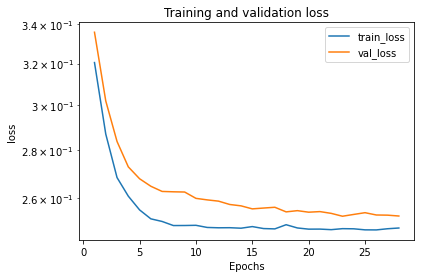

In [24]:
plot_metric(history,'loss')

In [25]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train.tolist(), 'Predicted': y_pred_train.tolist()})
    df_test  = pd.DataFrame({'Real': y_test.tolist(),  'Predicted': y_pred_test.tolist()})

    return performance, df_train, df_test



In [27]:
y_pred_train_nn = model.predict(X_train)
y_pred_test_nn  = model.predict(X_test)

y_train = np.array(y_train).reshape(-1,1)
y_test  = np.array(y_test).reshape(-1,1)

results, df1, df2 = model_performance(y_train, y_pred_train_nn, y_test, y_pred_test_nn)
results

3/3 [==============================] - 0s 5ms/step


C:\Users\mahna\AppData\Local\Temp\ipykernel_8208\627080939.py:17: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
C:\Users\mahna\AppData\Local\Temp\ipykernel_8208\627080939.py:18: RuntimeWarning: divide by zero encountered in true_divide
  MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)


,Error_metric,Train,Test
0,Mean error,-0.00,0.05
1,Mean absolute error,0.50,0.50
2,Mean squared error,0.25,0.26
3,Root mean squared error,0.50,0.51
4,Mean absolute percentual error,inf,inf
5,R2,0.01,-0.03
